<h1>Code to replicate the results in the R package @ https://ykunisato.github.io/lcmr/<h6>

In [2]:
import sys
sys.path.append('..')

import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

from LCM_default import *

In [3]:
# Set the seed.
np.random.seed(5)

# Create the subject_data.
nSubjects = 10
nTrials = 10
nCues = 2
data = []
for s in range(nSubjects):
    subject_data = {
        'CR': np.random.rand(nTrials),
        'CS': np.random.randint(0, 2, size=(nTrials, nCues)),
        'US': np.random.randint(0, 2, size=nTrials)
    }
    data.append(subject_data)

subject_data['US'] = np.reshape(subject_data['US'], (nTrials, 1))

print(subject_data)

{'CR': array([1.42875798e-01, 8.11944192e-01, 1.92279296e-01, 1.54745110e-01,
       4.07078957e-01, 3.82894367e-04, 8.45517816e-01, 1.61132453e-01,
       7.39250735e-01, 5.82910816e-01]), 'CS': array([[1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1]]), 'US': array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])}


In [4]:
# T = 30
# D = 3
# X = np.random.randint(0, 2, size=(T, D))

# X

In [5]:
# Subject_data with specific values.
US = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
CS = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Context = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
X = np.column_stack((US, CS, Context))

print(X)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]
 [0 1 1]]


In [6]:
# Set the opts and run LCM_infer.
opts = LCM_opts()
results = LCM_infer(X, opts)
V_values = results['V']
P_values = results['post']

exp_V = pd.DataFrame(V_values)
exp_V["Trial"] = np.arange(1, len(exp_V) + 1)

In [7]:
opts['alpha'] = 0.4

In [8]:
opts

{'a': 1, 'b': 1, 'alpha': 0.4, 'stickiness': 0, 'K': 10, 'M': 1}

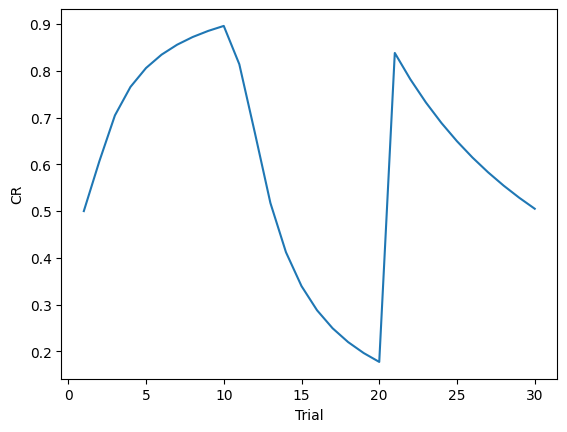

In [9]:
# Plot the CR over trials.
plt.plot(exp_V['Trial'], exp_V[0], label='CR')
plt.xlabel('Trial') 
plt.ylabel('CR')
plt.show()

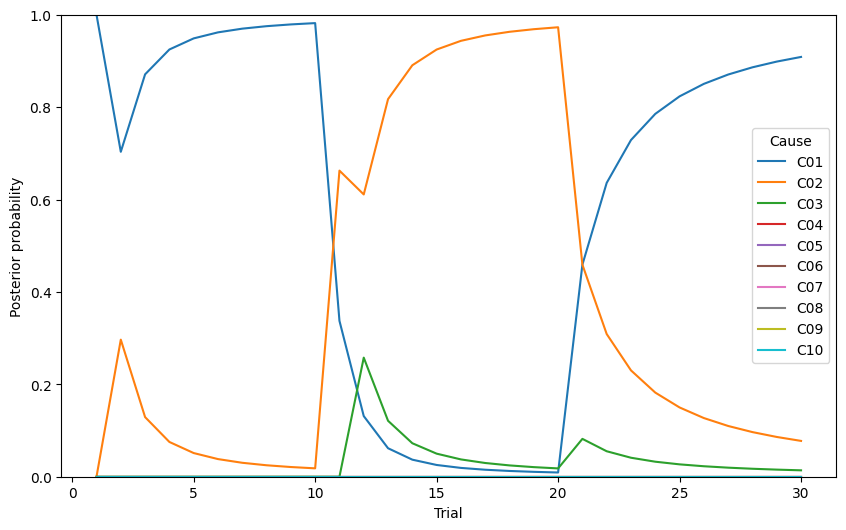

In [10]:
# Plot the posterior prob. over trials.
exp_post = pd.DataFrame(P_values)

exp_post["Trial"] = np.arange(1, len(exp_post) + 1)

exp_post.rename(columns={
    0: "C01", 1: "C02", 2: "C03", 3: "C04", 4: "C05",
    5: "C06", 6: "C07", 7: "C08", 8: "C09", 9: "C10"
}, inplace=True)

exp_post_melted = pd.melt(exp_post, id_vars=["Trial"], var_name="Cause", value_name="post")

exp_post_melted["Cause"] = pd.Categorical(exp_post_melted["Cause"])

plt.figure(figsize=(10, 6))
sns.lineplot(data=exp_post_melted, x="Trial", y="post", hue="Cause")
plt.ylim(0, 1)
plt.ylabel("Posterior probability")
plt.show()

In [11]:
exp_post

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,Trial
0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.703297,0.296703,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.870968,0.129032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.924744,0.075256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.948767,0.051233,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,0.961817,0.038183,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
6,0.969840,0.030160,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7,0.975205,0.024795,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
8,0.979016,0.020984,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9,0.981849,0.018151,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [12]:
# Create the conditioning data.
US = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
CS = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Context = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X = np.column_stack((US, CS, Context))

# Set the seed.
np.random.seed(5)

# Create alpha values for the subjects.
num_subjects = 30

subjects_alpha = np.random.uniform(0, 10, num_subjects)

ID_df = pd.DataFrame()
data_df = pd.DataFrame()
for i in range(num_subjects):
    opts = LCM_opts({'a': 1, 'b': 1, 'K': 10, 'M': 100, 'stickiness': 0})
    opts['alpha'] = subjects_alpha[i]
    batch_results = LCM_infer(X, opts)
    V_values = batch_results['V']

    ID_df["CR"] = pd.DataFrame(V_values)
    ID_df["Subject_ID"] = np.repeat(i + 1, len(ID_df + 1))
    ID_df = ID_df[["Subject_ID", "CR"]]
    
    X_df = pd.DataFrame(X)
    X_df.columns = ["US", "CS", "Context"]

    df_sub = pd.concat([ID_df, X_df], axis=1)
    data_df = pd.concat([data_df, df_sub], axis=0)

data_df.index += 1

In [13]:
subjects_alpha

array([2.21993171, 8.70732306, 2.06719155, 9.18610908, 4.88411189,
       6.11743863, 7.65907856, 5.18417988, 2.96800502, 1.87721229,
       0.80741269, 7.38440296, 4.41309223, 1.58309868, 8.79937031,
       2.74086462, 4.14235019, 2.96079933, 6.28787909, 5.7983781 ,
       5.99929197, 2.65819118, 2.84685881, 2.53588206, 3.27563948,
       1.44164301, 1.65612861, 9.63930529, 9.60226715, 1.88414656])

In [13]:
estimate_with_minim = LCM_fit(data = data_df, opts = {'a': 1, 'b': 1, 'K': 10, 'M':100,
                                                    'stickiness': 0, 
                                                    'alpha': subjects_alpha}, 
                                                    param_range = {'a_L': 0, 'a_U': 15},
                                                    est_method = 0)

Estimating subject alphas using scipy minimize L-BFGS-B
1  negative log likelihood: -30.341405325008473  parameter: [9.41909406]
2  negative log likelihood: -77.33946935940679  parameter: [2.77404177]
3  negative log likelihood: -25.803427102609714  parameter: [13.48509513]
4  negative log likelihood: -72.6154188261519  parameter: [3.14942385]
5  negative log likelihood: -29.337440531369094  parameter: [6.67522857]
6  negative log likelihood: -34.77334939174877  parameter: [8.63498144]
7  negative log likelihood: -62.59930788013864  parameter: [4.67543843]
8  negative log likelihood: -43.959364690205035  parameter: [0.94904995]
9  negative log likelihood: -28.49796598499902  parameter: [14.60951644]
10  negative log likelihood: -24.001743096184146  parameter: [14.54232514]
Estimating subject alphas using scipy minimize L-BFGS-B
1  negative log likelihood: -32.03224096047302  parameter: [1.40789567]
2  negative log likelihood: -64.94079454995496  parameter: [8.26340606]
3  negative log 

In [14]:
estimate_with_minim

,Subject_ID,alpha,nll,b,sd
0,1,2.774042,-77.339469,1.297891,0.254127
1,2,13.368604,-81.212253,1.304803,0.249960
2,3,1.843820,-90.459474,1.580359,0.144450
3,4,8.834421,-87.166035,1.297626,0.245669
4,5,3.608304,-64.569877,1.242100,0.266977
5,6,5.690050,-81.219602,1.289366,0.253179
6,7,14.599372,-59.928230,1.381319,0.221163
7,8,4.500436,-77.278933,1.238210,0.267403
8,9,4.100983,-76.418372,1.253195,0.268846
9,10,1.676533,-82.012485,1.244842,0.274535


In [15]:
estimated_alpha = estimate_with_minim['alpha']
estimated_alpha

0      2.774042
1     13.368604
2      1.843820
3      8.834421
4      3.608304
5      5.690050
6     14.599372
7      4.500436
8      4.100983
9      1.676533
10     1.723700
11     6.565136
12     6.519215
13     3.123215
14     9.724500
15     3.151544
16     5.353430
17     3.936573
18     7.628742
19     3.518118
20     6.671291
21     3.200254
22     3.452794
23     3.012069
24     2.506792
25     0.628056
26     1.299348
27    11.824193
28     5.711496
29     2.427456
Name: alpha, dtype: float64

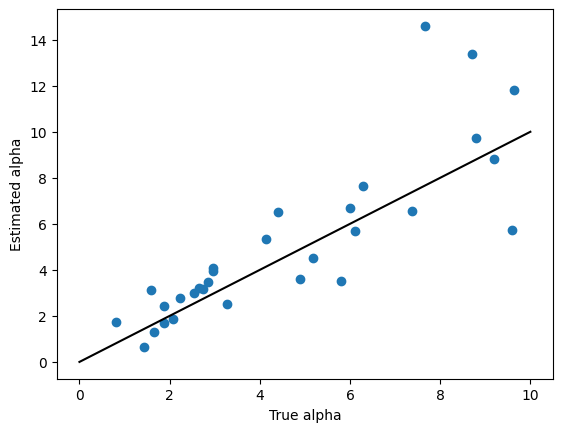

In [19]:
# Plot the values for scipy minimize L-BFGS-B
plt.plot(subjects_alpha, estimated_alpha, 'o')
plt.plot([0, 10], [0, 10], 'k-')
plt.xlabel('True alpha')
plt.ylabel('Estimated alpha')
plt.show()

In [14]:
estimate_with_minim_NM = LCM_fit(data = data_df, opts = {'a': 1, 'b': 1, 'K': 10, 'M':100,
                                                    'stickiness': 0, 
                                                    'alpha': subjects_alpha}, 
                                                    param_range = {'a_L': 0, 'a_U': 15},
                                                    est_method = 2)

Estimating subject alphas using scipy minimize Nelder-Mead
1  negative log likelihood: -38.50752630246188  parameter: [9.65457188]
2  negative log likelihood: -55.59327648705055  parameter: [5.45373668]
3  negative log likelihood: -81.31047869706592  parameter: [1.18337479]
4  negative log likelihood: -46.76266135969644  parameter: [7.47433115]
5  negative log likelihood: -40.7684204042278  parameter: [8.31550751]
6  negative log likelihood: -34.00013696763594  parameter: [11.26071913]
7  negative log likelihood: -85.4007597138354  parameter: [1.32029809]
8  negative log likelihood: -30.367911310426116  parameter: [13.09263695]
9  negative log likelihood: -58.559602553885114  parameter: [5.4236255]
10  negative log likelihood: -55.01085831348076  parameter: [5.69212948]
Estimating subject alphas using scipy minimize Nelder-Mead
1  negative log likelihood: -90.58619749516923  parameter: [15.]
2  negative log likelihood: -113.52460316068942  parameter: [11.19660615]
3  negative log likel

In [15]:
estimated_alpha = estimate_with_minim_NM['alpha']
estimated_alpha

0      1.320298
1     11.196606
2      2.202675
3      7.976464
4      6.018401
5      6.266845
6      8.830302
7      5.338122
8      3.544961
9      1.606347
10     0.226382
11     6.632112
12     3.660313
13     2.188198
14    10.380133
15     2.853427
16     4.097645
17     4.085145
18     5.639981
19     4.457203
20     6.319201
21     2.358697
22     1.677878
23     2.399997
24     3.123885
25     2.265894
26     1.455596
27     8.831647
28     9.557405
29     2.311803
Name: alpha, dtype: float64

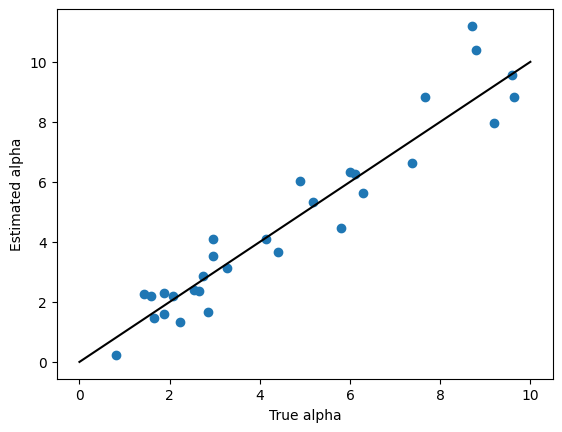

In [16]:
# Plot the values for estimate Nelder-Mead
plt.plot(subjects_alpha, estimated_alpha, 'o')
plt.plot([0, 10], [0, 10], 'k-')
plt.xlabel('True alpha')
plt.ylabel('Estimated alpha')
plt.show()

In [12]:
estimate_with_post_mean = LCM_fit(data = data_df, opts = {'a': 1, 'b': 1, 'K': 10, 'M':100,
                                                    'stickiness': 0, 
                                                    'alpha': subjects_alpha}, 
                                                    param_range = {'a_L': 0, 'a_U': 15},
                                                    est_method = 1)

Estimating subject alphas using post mean
Subject 1 estimated alpha: 2.246411399728922 logBF: 44.89514380472324
Subject 2 estimated alpha: 12.428429004678739 logBF: 65.06649714163402
Subject 3 estimated alpha: 2.7270685849621783 logBF: 11.891041359685104
Subject 4 estimated alpha: 8.365260873114881 logBF: 66.58698148933208
Subject 5 estimated alpha: 6.211821627871052 logBF: 63.13280303926843
Subject 6 estimated alpha: 5.3929812630062495 logBF: 66.943364910469
Subject 7 estimated alpha: 9.387579624231496 logBF: 71.33826827114774
Subject 8 estimated alpha: 5.151476117309519 logBF: 61.96982635365722
Subject 9 estimated alpha: 2.878786359092406 logBF: 37.12488058542846
Subject 10 estimated alpha: 1.5374491403414987 logBF: 14.817016928830014
Subject 11 estimated alpha: 0.4504224227726515 logBF: 28.576636959860032
Subject 12 estimated alpha: 6.863214489069199 logBF: 63.75316419941305
Subject 13 estimated alpha: 4.394081970498492 logBF: 56.938758700041895
Subject 14 estimated alpha: 2.6463272

In [13]:
estimated_alpha = estimate_with_post_mean['alpha']
estimated_alpha

0      2.246411
1     12.428429
2      2.727069
3      8.365261
4      6.211822
5      5.392981
6      9.387580
7      5.151476
8      2.878786
9      1.537449
10     0.450422
11     6.863214
12     4.394082
13     2.646327
14     8.385504
15     3.268927
16     4.948158
17     3.649002
18     6.060859
19     5.568858
20     5.909152
21     2.709743
22     2.640975
23     3.181811
24     3.070202
25     1.402212
26     1.666634
27    11.510450
28     7.424560
29     1.515152
Name: alpha, dtype: float64

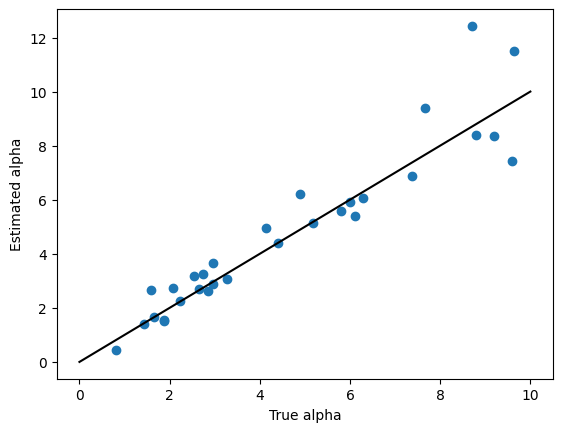

In [14]:
# Plot the values for estimate with post mean
plt.plot(subjects_alpha, estimated_alpha, 'o')
plt.plot([0, 10], [0, 10], 'k-')
plt.xlabel('True alpha')
plt.ylabel('Estimated alpha')
plt.show()

In [15]:
# Construct the subject_data for LCM_infer_rw.
time = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 86404, 86408, 86412, 86416, 86420, 86424])
US = np.array([1,0,0,1,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
CS1 = np.array([1,0,0,1,1,0,1,0,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0])
CS2 = np.array([0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1])
X = np.column_stack((time, US, CS1, CS2))

# Set opts.
opts = {
    'a': 1, # hyperparam beta prior.
    'b': 1, # hyperparam beta prior.
    'c_alpha': 0.45, # concentration parameter.
    'stickiness': 0, # stickiness parameter.
    'K': 15, # max number of latent causes.
    'g': 1.0, # temporal scaling parameter.
    'psi': np.zeros(len(time)),  # PSI is set to 0 across t, protein synthesis inhibitor from the paper @ https://gershmanlab.com/pubs/gershman_thesis.pdf
    'eta': 0.2, # learning rate.
    'maxIter': 3, # num. iter between each trial.
    'w0': 0, # initial weight.
    'sr': 0.4, # US variance.
    'sx': 1, # stimulus variance.
    'theta': 0.3, # response threshold.
    'lambda': 0.005, # response gain.
    'nst': 0 # set to 0 for non-sigmoidal transformation.
}

results = LCM_infer_rw(X, opts)

/home/ari/Documents/projects/msc-thesis-cimcim-main/latent_cause_models/LCM_default.py:189: RuntimeWarning: divide by zero encountered in reciprocal
  S = Dist ** (-opts['g'])


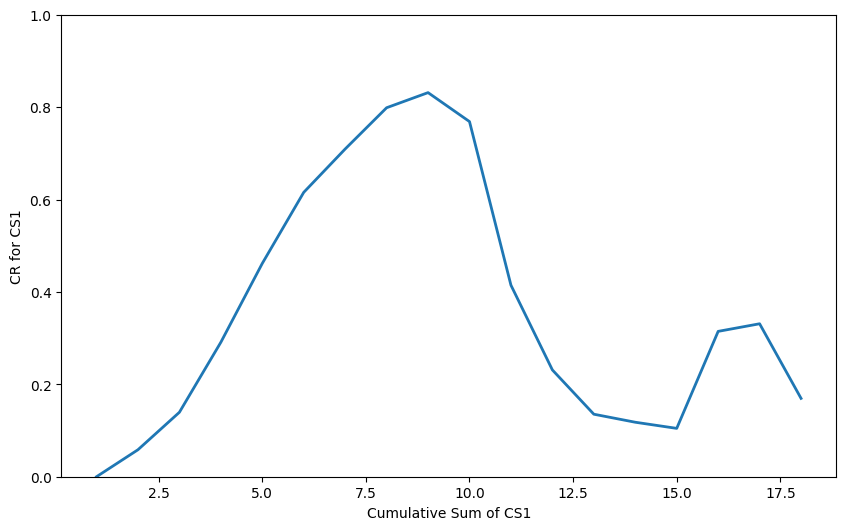

In [16]:
sim_df = pd.DataFrame(X, columns=["Time", "US", "CS1", "CS2"])
sim_df["Cumsum CS1"] = sim_df["CS1"].cumsum()
sim_df["Cumsum CS2"] = sim_df["CS2"].cumsum()
sim_df["CR"] = results["V"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=sim_df[sim_df["CS1"] == 1], x="Cumsum CS1", y="CR", linewidth=2)
plt.ylabel("CR for CS1")
plt.xlabel("Cumulative Sum of CS1")
plt.ylim(0, 1)
plt.show()

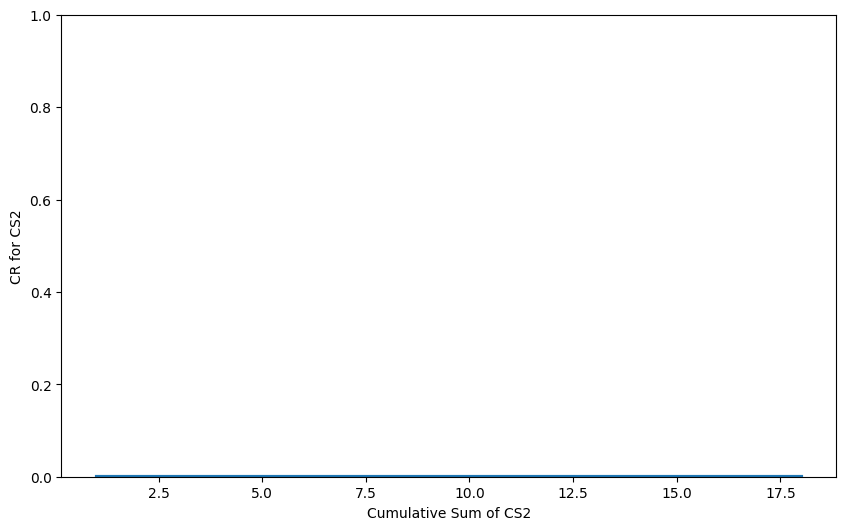

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sim_df[sim_df["CS2"] == 1], x="Cumsum CS2", y="CR", linewidth=3)
plt.ylabel("CR for CS2")
plt.xlabel("Cumulative Sum of CS2")
plt.ylim(0, 1)
plt.show()